In [1]:
using ModelingToolkit, StochasticDiffEq, Plots

In [2]:
# Define some variables
@parameters σ ρ a₋₁ a₂ a₀ a₁ r
@variables t x(t) 
D = Differential(t)

μ = [D(x) ~ a₋₁/x - a₀ + a₁*x - a₂*x^r]

Σ = [σ*x^ρ]

@named ait_sahalia = SDESystem(μ,Σ,t,[x],[σ,ρ,a₋₁,a₂,a₀,a₁,r])

initializations = [
    x => 1.0
]

param_map = [
    σ => 1.01,
    ρ => 1.2,
    a₋₁ => 2.0,
    a₂ => 20.0,
    a₀  => 0.1,
    a₁ => 2.0,
    r => 3.5
]

prob = SDEProblem(ait_sahalia,initializations,(0.0,1.0),param_map);
sol = solve(prob,EM(), dt=1e-4, adaptive=false);

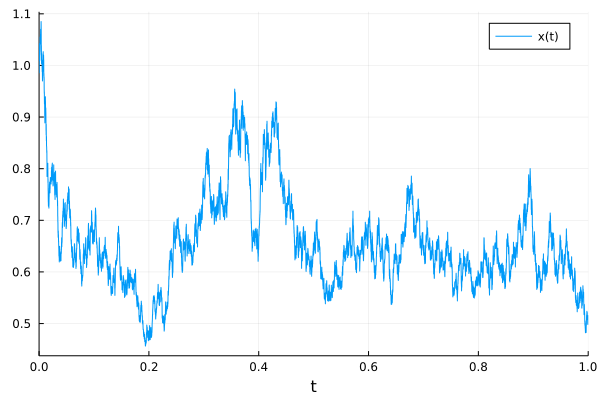

In [3]:
plot(sol)

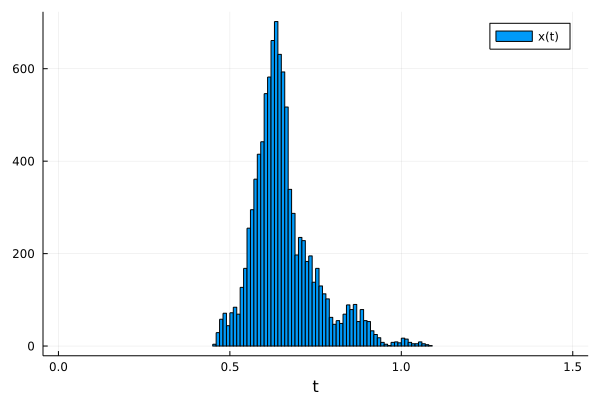

In [4]:
histogram(sol, xaxis = [0.0,1.5])